In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

sns.set_style('white')
sns.set_context('poster')


# Exercises: Supervised Learning

# Part 1: Regression

In this notebook, we will go through various techniques related to supervised machine learning. You're advised to do the full first bit (until part 1a starts), in order to get accustomed to the scikit-learn API and some standard practices that we will use throughout the workshop.

After that, the parts 1 a-c are optional. You will probably have time to do at least one. Feel free to pick whatever topic appeals to you most. Of course you are free to do more, if you like. Part 2 is in this same notebook, but will be preceded by some more instruction.

Although I would advice one to typically import all necessary packages on top of a notebook, I only imported the more general packages up here. The packages that are needed for the algorithms under discussion are imported when they are used, in order to show which packages are used for what.

Much of the material here is adapted from [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) by Jake VanderPlas and a [workshop at SciPY 2016](https://github.com/amueller/scipy-2016-sklearn) by Sebastian Raschka and Andreas Mueller.

## A gentle introduction: Simple linear regression
In this first section we will run through a simple version of a linear regression. This exercise is meant to familiarize yourself with the API in a regime that you probably know how to deal with using traditional statistics.

### The data
We will set up a very simple data set that has a linear as well as a sinusoidal dependence of the target variable plus some scatter:

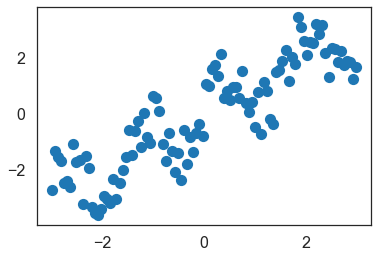

In [2]:
x = np.linspace(-3, 3, 100)            # one hundred points between x=-3 and x=3
rng = np.random.RandomState(42)        # Initialize a random state
scatter = rng.uniform(low=-1., high=1., size=len(x))   # Scatter is uniformly distributed between -1 and 1 
y = np.sin(4 * x) + x + scatter        # Introduce dependence and uniform 
plt.plot(x, y, 'o');                   # Let's have a look!

### Fit a straight line
The question would be to fit a straight line to this data. Please try this the way you tried it before, so you can compare to the scikit-learn way afterwards.

If you have no idea how to attack this problem (in Python), please just peek at the solution notebook and find one possible way to approach this.

When diving into machine learning, sticking to the scikit-learn API is a good framework to use, as it provides simpliciy and unity. Linear regression in that package is done with sklearn.linear_model.LinearRegression. You will have to provide the API with hyperparameters (parameters which determine how the model will be evaluated) as well as data to "train" on, which is called to "fit". It can then predict the y-value for new data with the same parameters easily.

Please load the module, initialize a linear regression and fit on the data set. Also predict the y-data and look at the results (print, plot, etc.). Note that the input features are required to be a 2D array, even if there's only one input feature.

Results should be the same as your method, as linear regression is a fully deterministic process. Please compare! This method should be roughly equally simple as yours.

To get used to some of the lingo of the field of machine learning, let's have a look at the measure of goodness-of-fit that is commonly usedin machine learning: $R^2$. In classification problems, $R^2$ comes down to the fraction of the objects that is correctly classified, while for continuous variables it is the fraction of the variance that is explained, or one minus the remaining variance:
$$ R^2 = 1 - \frac{\Sigma(y-y_\textrm{fit})^2}{\sigma^2} $$
where $\sigma^2 = \Sigma(y-y_\textrm{mean})^2$ is the variance of the original sample. The "score" method of scikit-learn objects (that exists after fitting and predicting) is precisely that. Get the model score of the fit above.

A value close to zero means that the model doesn't do very well in predicting the target variable, whereas 1 means it woud be perfect. It can become negative, which indictaes that the model predictions are in fact a worse estimate than always just predicting the average of the target variables in the data.

### Training data versus test data

It is common practice to split your data in a training sample and a test sample. The training data is used to train the model on, while the test set is meant to independently assess the performance of your fit on "new" data. Why this is of great importance should become clear throughout the workshop.

Because it is so commonly used, scikit-learn has built-in functionality to do so: sklearn.model_selection.train_test_split is a function that defines a (random) part of your data set to be training data and the rest to be test data. A rule of thumb for the fraction of the data that should be used for training versus testing is roughly 75% vs 25%, respectively. These are no hard limits, though, and in very large data sets one could get away with very different numbers. Verify that the default value is 25% test data, and have a look at other options than indicating the fraction (double-tap when inside the function's brackets).

Now you can train your model on the training data and tests its performance on both the data that it *has* seen while training, as well as on an independent random subset, the test data. Please train the model on the training data, and assess the score on both training and test data.

Typically, you want the $R^2$ on test and training data to be comparable, and typically it is slightly higher for the training data, which it has seen before. If the two numbers are very different, then typically the one for the training data is much higher, indicating 'over-fitting': the model has adapted to some random features in the training data that do not appear in the test data. We will see examples of that later on.

## 1 a. k-Nearest Neighbor regression

On the same data set that we used in the linear regression example above, please perform a k-Nearest Neighbor regression (in sklearn.neighbors you will find the KNeighborsRegressor) first with all the defaults of the regressor. Train on the train data and compare scores of train and test data. Also, plot the real x and y, as well as the 'predicted' ones for test data. Carefully examine the points and think about it for a bit.

You will observe that the training set $R^2$ is much higher than that of the test set. Have a look at the graph again and see if you can understand this. 

Q: Where are the neighbors for the prediction of the test set taken from?

Q: Will a different distance metric make a difference in this example? Why (not)?

One of the fundamental hyperparameters of the kNN regressor is the number of neighbors used. Please investigate the performance of the model (the $R^2$ values for both training and test data) for a range of different numbers of neighbors used. For this particular data set, can you identify a "sweet spot" in the number of neighbors? How much is it, and why?

Please take a minute or two to digest the features of different test and training $R^2$ values, as a function of number of neighbors.

Play with the amplitude and frequency of the sine that generated the data and investigate if the number of neighbors to use is alway the same, or whether it depends on your data.
Also, try nearest neighbor regression on data sets with very small number of data points in your training sample.

## 1 b. Support Vector Machine regression

On the same data set that we used in the linear regression example above, please perform a Support Vector Machine regression (in sklearn.svm you will find the SVR) first with all the defaults of the regressor. Train on the train data and compare scores of train and test data. Don't worry too much yet about how this works, we will look at it in more detail when doing classifications. As always, plot your data as well! You might notice that not all "features" of the training data are always captured.

In SVM modeling of data there are many choices to be made. Which one is important depends strongly on your data. Take a look at the docstring of the SVR and play with several of the inputs. Refer to the instruction notebook for some details on what these hyperparameters do. Which one do you think is important here? Try it out!

## 1 c. Lasso, ARD and RANSAC regression

This exercise is meant to show you that, to some extent, it isn't always necessary to know how the model you use works, under the hood. Although in practice it is often not satisfactory to have a model running that gives a result that you don't know how to interpret, it is not always strictly necessary to know why a model predicts what it predicts. As long as the model does a good job (and it isn't meant to explain any of its features), it may be good enough.

On the same data set that we used in the linear regression example above, please perform a Lasso regression (in sklearn.linear_model you will find Lasso), an ARD regression (sklearn.linear_model -> ARDRegrssion) and a RANSAC regression (sklearn.linear_model -> RANSACRegressor) first with all the defaults of the regressor. Train on the train data and compare scores of train and test data. Is one easier to fine-tune than the other? If you don't understand the nature of a model, what are the drawbacks? 

Because of the unity of the sklearn API, it is extremely simple to change your model into something else and run all your code again. Make use of that to run through some random variations of the split between training and test data. Is the model fit sensitive to such variations? Is that maybe worse for one model than for the other?

### Bonus exercise to part 1:
Generate a data set with a linear dependence and scatter in 45 dimensions and very many data points (say, a million or so). Compare the predictive power of linear regression, nearest neighbor regression, and any of the LASSO/ARD/RANSAC. Also compare the performance (run time) of all methods. Can you explain the complexity of all of the methods?

# Part 2: Classification

In classification problemas we are prdicting "labels", based on input parameters. The labels are usually categorical, but can be ordinal (categorical with a menaingful order, e.g. 'small', 'large') as well.

For the first exercises we make use of data sets generated by make_blobs, from sklearn.datasets:

In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


This is what they look like, colored by the label:


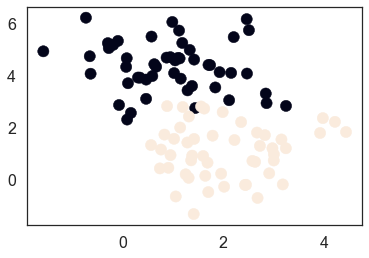

In [19]:
plt.scatter(X[:,0], X[:,1], c=y);
print("This is what they look like, colored by the label:")

Just like for regression, many algorithms exist for classification problems. One of those is logistic regression. As this is the basis for stuff we will see later, it is probably wise to go over that bit here first. After that, have your pick of (a) regression trees (plus random forests), (b) support vector machine classification, or (c) nearest neighbor classification. The latter two are, not suprisingly, closely related to the corresponding regression techniques.

## Logistic regression
As you saw, the data set has the label depending mostly on the X[:,1] variable. For illustartive purposes, let's focus on just that variable. Try to use the classifiers. The fit, score and predict methods are entirely equivalent to their regression model counterparts. For now, forget about a training and test sample, we will focus on training only. Loading the classifier is done for you, so you can look at the doc string, if you need to.

In [20]:
x = np.reshape(X[:,1], (-1, 1))     # That reshape trick is to get the right shape for the classifier
# x = X[:,1]                        # You can try to see what it does without!
print(np.shape(x))
print(np.shape(y))

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

(100, 1)
(100,)


Now fit the classifier in order to predict x based on y. Get the $R^2$ value as well. In case of classification this is nothing else than the fraction of correctly labeled observations.

A logistic classification fits a logistic function to the input features to predict probabilities of a given observation being one label or another. In this simple example, there is only one input feature, and there are only 2 possible labels. It should therefore be very easy to plot the logistic functions, by using the classifier attribute "predict_proba", which gives the probablities that any given observations is either of the labels. Check out the shape, and plot the probabilities as a function of x. 

Note the shape, and look at the data set to compare. 

Now fit on two variables and investigate these attributes as well. How do the scores compare? Also plot both input feature dimensions against each other and indicate both the true label and the probability in some way.

## Support Vector Classification

SVCs do not fit a function to determine the label of a data point, but they fit a line or manifold that tries to split the classes optimally. For some more background, see the instruction notebook.

Take the same blobs as up here in the logistic regression example, fit a support vector classifier with a linear kernel and plot the points, as well as the line that splits the two classes best (There is a function in the instruction notebook, but you're welcome to come up with your own solution). 

You might notice that the default option of an SVC fits a very funky function. Try it out! Have a look at the attributes (after fitting) model.support\_vectors\_ and compare the linear kernel to the default choice.

How would you describe the function of the support vectors?

SVCs are computatoinally expensive and you probably don't want to fit any with more than a few thousand data points. Do you think random (sub-)sampling your data points will help? Why? 

With the next data set, we will give that a try and see how well we fare on a test set, given training sets of different sizes.

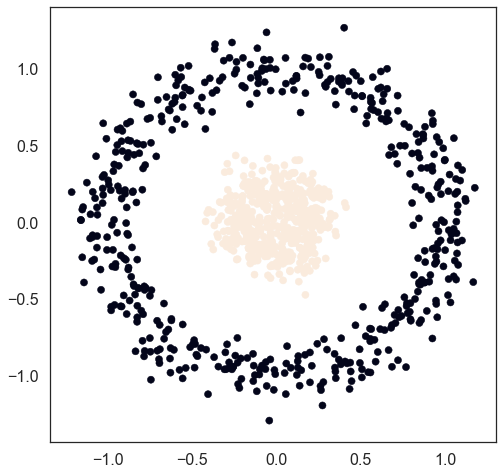

In [29]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=.2, noise=.1)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

Obviously, a linear kernel is not going to help you very much for this classification. But we will try it anyway. Make a linear one, plot everything and calculate a $R^2$ on a test set (10% of the data should be enough). Comment on the location of the separator and the number of support vectors.

The RBF kernel is meant to work with data for which radial dependence is clear. What it does is introducing an extra dimension in your data set, that is dependent on the distance to the origin.

Use an 'rbf' kernel and fit all the data. Then compare the value of $R^2$ for smaller subsamples as your training data (which you are going to need when your data set is very big). Take many low values of that fraction to catch the behavior.

As you will have noticed, down to very low values of the fraction, $R^2$ stays very high. This is because the support vectors in the small (random!) subsample are still around the same manifolds as in bigger subsamples. 

If you wish, try playing with the "factor" parameter in make_circles (increase it) and see is the statements here hold up!

**Bonus exercise:** Investigate how any of the SVC models you tried depends on different choices of the softening parameter C. It will be more enlightening if you try on a model with $R^2 \sim 0.8$ or so.

# Decision is a form of classification!

A well known ML algorithm is the decision tree. It is very insightful, as you can just follow along the tree and see where you end up. Very useful if you have to explain how your model works to non-technical people!

We will build a decision tree for a famous data set: the Titanic survival vs death records. We will be reading it using pandas, so it results in a DataFrame. For this exercise it's not crucial that you know what this is, but if you want to become more fluent in data science and machine learning, you will probably want to know it intimately at some point.

In [39]:
titanic = pd.read_csv(os.path.join('data', 'titanic3.csv'))
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We will assume that we want to predict who will survive, based on the following columns: 
- pclass: Passenger class (1st, 2nd, 3rd)
- sex
- age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- fare
- embarked: Port of origin (C = Cherbourg; Q = Queenstown; S = Southampton)

Let's get this into a useful shape. Learning algorithms are typically better with numbers than labels. Pandas has the method "get_dummies" to transform columns like "sex" to 0 and 1, rather than female and male. In some cases, like embarked, there are three options. Using 0, 1 and 2 for that would (unfairly) put two of the pairs closer together than the other pair of options. Therefore, labeled columns are alwasy transformed into as many columns as there are options, with a 1 only in the correpsonding column. As such, all "distances" are in those features are the same. The pclass is a number, but let's pretend it's categorical, too. Pandas is fine with that. Finally, let's make them numpy arrays, as we are used to, scikit-learn likes that.

In [40]:
labels = titanic.survived.values
features = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
features_dummies = pd.get_dummies(features, columns=['pclass', 'sex', 'embarked'])
features_dummies.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1


In [41]:
data = features_dummies.values
type(data)

numpy.ndarray

Decision trees are in sklearn.tree. Import the one for classifications, train it, score it, visualize it (see instruction notebook). If you like, you can do a train_test_split, but for the point of this exercise it isn't strictly necessary. You will notice, hopefully that there is missing data in the data set. This can be fixed with data imputation. sklearn.preprocessing has "Imputer", which works just fine. Look up what it does and use it appropriately! You could also just remove any observations that have missing/nan/infinte/... features, or do some imputation by hand.


No need to worry if the dot is not working for you. Investigate the structure of the tree. If you used the default settings, it will have created many many branches, with often more than 2 splits. Create one that has two splits at mosty and a maximum depth of 2 and 3 (that's two different trees). This is more tractable for the simple user... Is it performing much worse? What is the most important property of people? With depth/number of leaves two and three, does the upper (most important) split change? 


0

The image in this markdown cell will only show up if you have made it. If you replace it, just run the cell again and your new version will show up. Call your "dotted" tree simpletree.png and the image should show up below.

<img src="simpletree.png" alt="A simple tree">

If the "dot" visualizatoins are giving you errors, you can get to the importance of the different feature in the tree using the attribute tree.feature_importances (highest will come first):


Finally, investigate the behavior of the tree if you train it on different subsets (try small as well as large subsets). Pay special attention to the what is classified as the strongest predictor.